In [1]:
import numpy as np
import random
import multiprocessing as mproc
import matplotlib.pyplot as plt
import tqdm
from tqdm.notebook import tqdm as tqdm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

import model_opt
import algo_GD
import helper

In [2]:
w_init = np.array([3,3])
_t_max = 2
f = model_opt.RosenBrock()

In [3]:
# b <= x_1 <= a , b <= x_2 <= a において一様にランダムな点をn回とり、勾配ノルムの平均を測定
helper.grad_norm(model=f,a=3,b=-3,n=10000)

1757.678197193484

In [4]:
x = np.arange(10)
noise = helper.gauss(x)
k = helper.iqr(noise)

In [5]:
helper.student_t(x,1)

array([-0.17765108,  2.16222279, -4.12420692,  4.10347816, -0.09677633,
        0.4087609 ,  1.02617882, -2.72782697,  1.04514644, -0.49880217])

In [6]:
iqr_store = []
for i in range(1000):
    x = np.arange(1000)
    noise = helper.student_t(x,10)
    k = helper.iqr(noise)
    iqr_store.append(k)

(array([  5.,  13.,  62., 125., 213., 222., 175., 120.,  46.,  19.]),
 array([1.23750541, 1.26748713, 1.29746885, 1.32745056, 1.35743228,
        1.387414  , 1.41739572, 1.44737744, 1.47735916, 1.50734088,
        1.53732259]),
 <a list of 10 Patch objects>)

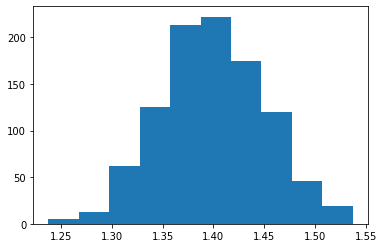

In [7]:
plt.hist(iqr_store)

In [12]:
np.mean(iqr_store) / 1.349

0.9983305903563783

(array([ 72., 147., 133., 129.,  98.,  51.,  48.,  50.,  48.,  34.,  19.,
         16.,  25.,  14.,  10.,  13.,   8.,   5.,   9.,  10.,   3.,   5.,
          2.,   5.,   7.,   1.,   4.,   2.,   1.,   2.,   3.,   2.,   1.,
          2.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,
          1.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.87870613e-02, 2.53448856e-01, 4.88110651e-01, 7.22772446e-01,
        9.57434241e-01, 1.19209604e+00, 1.42675783e+00, 1.66141963e+00,
        1.89608142e+00, 2.13074322e+00, 2.36540501e+00, 2.60006681e+00,
        2.83472860e+00, 3.06939040e+00, 3.30405219e+00, 3.53871399e+00,
        3.77337578e+00, 4.0080

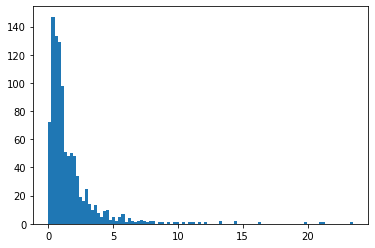

In [9]:
plt.hist(helper.log_normal(mean=0,sigma=1,w=np.arange(1000)),bins=100)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 8.000e+00, 6.000e+00, 5.000e+00, 1.200e+01, 1.800e+01,
        1.700e+01, 1.900e+01, 3.800e+01, 4.700e+01, 6.900e+01, 7.700e+01,
        1.040e+02, 1.320e+02, 1.600e+02, 1.970e+02, 2.690e+02, 3.170e+02,
        3.990e+02, 4.510e+02, 5.990e+02, 6.590e+02, 7.930e+02, 8.910e+02,
        1.115e+03, 1.284e+03, 1.359e+03, 1.629e+03, 1.790e+03, 2.008e+03,
        2.218e+03, 2.369e+03, 2.674e+03, 2.856e+03, 3.034e+03, 3.219e+03,
        3.309e+03, 3.409e+03, 3.567e+03, 3.585e+03, 3.687e+03, 3.704e+03,
        3.735e+03, 3.610e+03, 3.422e+03, 3.364e+03, 3.343e+03, 3.095e+03,
        2.987e+03, 2.714e+03, 2.532e+03, 2.388e+03, 2.204e+03, 1.951e+03,
        1.780e+03, 1.628e+03, 1.371e+03, 1.276e+03, 1.069e+03, 9.680e+02,
        8.270e+02, 6.680e+02, 5.460e+02, 4.810e+02, 4.220e+02, 3.390e+02,
        2.650e+02, 1.870e+02, 1.490e+0

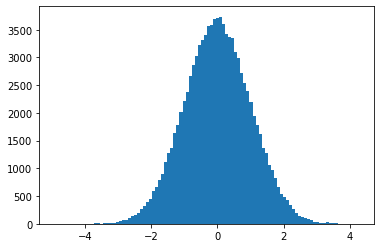

In [22]:
plt.hist(helper.student_t(w=np.arange(100000),v=10000),bins=100)


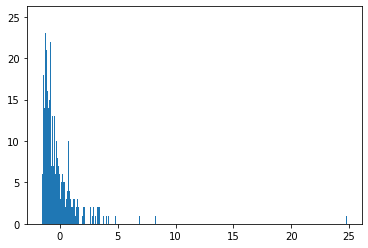

In [14]:
k = helper.lognormal(mean=0,sigma=1,w=np.arange(1000))
plt.hist(k - k.mean(),bins=1000)
plt.show()

In [ ]:
k = helper.lognormal(mean=0.1,sigma=1,w=np.arange(1000))
plt.hist(k - k.mean(),bins=1000)
plt.show()

In [ ]:
helper.iqr(k)

In [ ]:
w_init = np.array([3,3])
_t_max = 3000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []
for i in range(10):
    var = np.random.randint(1,300,1)[0]
    noise = helper.gauss
    f = model_opt.RosenBrock(noise=noise,var=var)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        algo.update(model=f)
        
    iqr_store.append(helper.iqr(algo.noise_store))
    last_w_store.append(algo.w)
        

    

In [ ]:
last_w_store

In [ ]:

w_init = np.array([3,3])
_t_max = 1000
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
w_star = f.w_star
f = model_opt.RosenBrock(noise=noise,var=100)
for i in tqdm(algo):
    algo.update(model=f)
    
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [ ]:
#ノイズを記録したもの。そのIQRについて調べている。
noise_norm = np.array(algo.noise_store).flatten()
helper.iqr(noise_norm)

In [ ]:
print(k)
